AttributeError: 'Axes' object has no attribute 'set_zlabel'

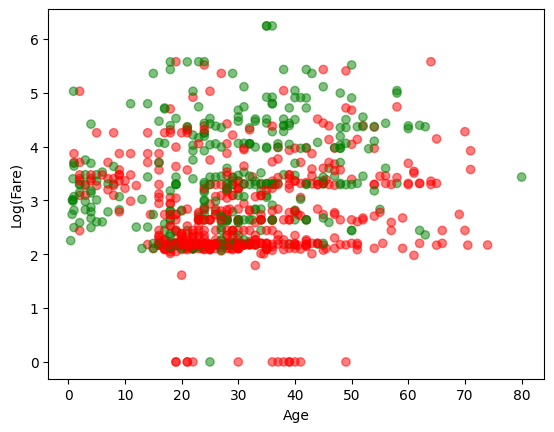

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv("./datasets/titanic.csv") #dataframe - dict with key as columns, titanic = {"Name", [....], "Age", [.....]}
#print(df.groupby("Sex")["Survived"].mean())

fig, ax = plt.subplots()
log_fare = np.log1p(df['Fare']) 
colors = df['Survived'].map({1: 'green', 0: 'red'})

ax.scatter(df['Age'], log_fare, df['Pclass'], c=colors, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Log(Fare)')
ax.set_zlabel('Class (1-3)')
ax.set_title('Survivor cluster')
plt.show()

In [2]:
#creating own series objects, data frame and plotting it
area = pd.Series({"california":1234, "texas":3456, "Newyork":5689, "Arizona":45567})
popl = pd.Series({"california":1000, "texas":2000, "Newyork":3000, "Arizona":4000})
states = pd.DataFrame({'population':popl, 'area':area}) #series = each data column of dataframe
#states.plot(x='area', y='population', kind='pie')
states.plot.pie(y='population', title='Population', autopct='%1.1f%%', explode=(0,0,0,0.3), shadow=True, startangle=140)
plt.show()

,population,area
california,1000,1234
texas,2000,3456
Newyork,3000,5689
Arizona,4000,45567


In [12]:
#outliers in data
import pandas as pd
import numpy as np

data = {"Values" : [10.20,15, 14, 19, 99, 18, 16, 17, 100, 13, 110]}
df= pd.DataFrame(data)

#outliers using Z-score 
df["Z-score"] = (df["Values"]- df["Values"].mean()) / df["Values"].std()
outliers = df[np.abs(df["Z-score"]) > 3]
print("Outliers detected using Z-scores: \n", outliers)

#outliers using IQR
Q1 = df["Values"].quantile(0.25)
Q3 = df["Values"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Values"] < lower_bound) | (df["Values"] > upper_bound)]

Outliers detected using Z-scores: 
 Empty DataFrame
Columns: [Values, Z-score]
Index: []


In [ ]:
#Handling inconsistent data - normalisation, standardisation, catogorisation, 